This notebook showcases a quick and dirty image segmentation method based on Canny edge filtering for freely moving salmon.

The goal was to find out if Canny edge detection was sufficient to get good fish segmentation by itself and the short answer is no.

The result is not particularly impressive and there are many other things to try including: background subtraction, filtering based on the fish's grayish color, fish-shape model-based object detection, active contours, etc.

The image dataset comes from the first few seconds of https://www.youtube.com/watch?v=YZ_qJ5JFD3I

In [1]:
import numpy as np
import cv2 as cv
from skimage.morphology import erosion, dilation, opening, closing, flood_fill, square, remove_small_objects
from scipy import ndimage
from matplotlib import pyplot as plt
import os
from google.colab import drive
import random as rng

Get the images from google drive. Authentication is required for the first time.

In [2]:
drive_path = '/content/drive'
image_path = drive_path + '/MyDrive/Colab Notebooks/BergenFrames'
drive.mount(drive_path)
imgs = os.listdir(image_path)
single_img_path = image_path + '/' + imgs[1]

Mounted at /content/drive


Canny Edge Filtering

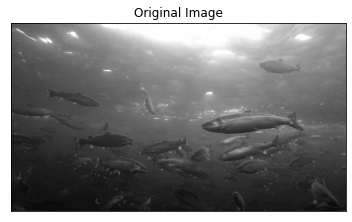

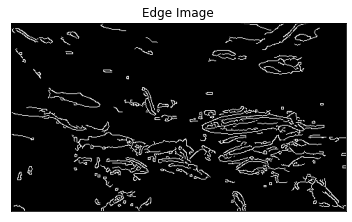

In [3]:
img_orig = cv.imread(single_img_path,0)
plt.imshow(img_orig, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

#downsample from 1080p
img = cv.pyrDown(img_orig)
img = cv.pyrDown(img)
img = cv.blur(img, (3,3))
edges = cv.Canny(img,15,60)

plt.imshow(edges, cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

morphological operations on canny filtered image to clean up and create particles

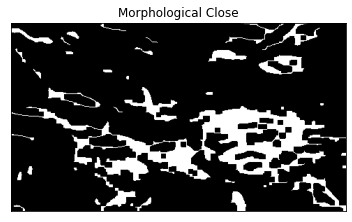

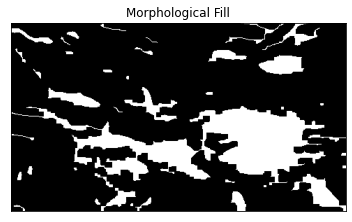

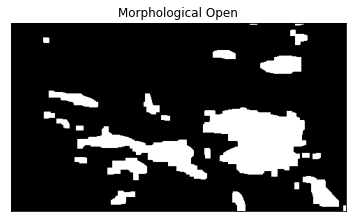

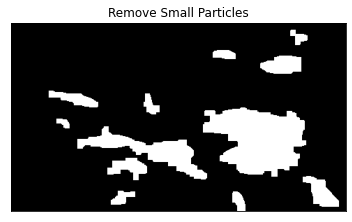

In [4]:
morph_edges = closing(edges,square(7)) #close to connect disjoined lines
plt.imshow(morph_edges, cmap = 'gray')
plt.title('Morphological Close'), plt.xticks([]), plt.yticks([])
plt.show()

morph_edges = ndimage.binary_fill_holes(morph_edges) #fill in the fish
plt.imshow(morph_edges, cmap = 'gray')
plt.title('Morphological Fill'), plt.xticks([]), plt.yticks([])
plt.show()

morph_edges = opening(morph_edges,square(7)) # remove spurious lines
plt.imshow(morph_edges, cmap = 'gray')
plt.title('Morphological Open'), plt.xticks([]), plt.yticks([])
plt.show()

morph_edges = remove_small_objects(morph_edges,min_size = 150) # remove objects that are too small
plt.imshow(morph_edges, cmap = 'gray')
plt.title('Remove Small Particles'), plt.xticks([]), plt.yticks([])
plt.show()

Draw particle contours on top of origional image

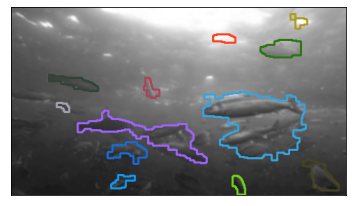

In [5]:
morph_edges=np.uint8(morph_edges)
contours,hierarchy = cv.findContours(morph_edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# Draw contours
drawing = cv.cvtColor(img, cv.COLOR_GRAY2RGB)
for i in range(len(contours)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256)) #randomly pick a color
    cv.drawContours(drawing, contours, i, color, 2, cv.LINE_8, hierarchy, 0)
# Show in a window
plt.imshow(drawing), plt.xticks([]), plt.yticks([])
plt.show()


shut down google drive


In [6]:
drive.flush_and_unmount()